As a part of #100DaysOfMLCode have started with this dataset due to lack of ML exposure. For the initial parts will be implementing various alogroithms inspired from other submissions. 

In [35]:
# Packages used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [36]:
#Loading the Data as Pandas Data Frame
train_ft_df = pd.read_csv('train_features.csv')
train_lab_df = pd.read_csv('train_label.csv')
train_df = train_ft_df.merge(train_lab_df,on ='id')

In [37]:
print(train_df.shape)

(59400, 41)


In [38]:
#Data Cleaning
#Cleaning Numerical Features
#Replacing meaningless zero values with NaN
#train_df['amount_tsh'].replace(0.0,np.nan,inplace = True)
#train_df['population'].replace(0.0,np.nan,inplace = True)
#train_df['gps_height'].replace(0.0,np.nan,inplace = True)
#train_df.isnull().sum()

In [39]:
## To reduce redundant Features droping sub-gorup classifiers.
train_df = train_df.drop(['quantity','waterpoint_type'],axis = 1);


In [40]:
#Converting Categorical Features as one hot encoded values
train_df.dtypes
#train_df = pd.get_dummies(train_df,dummy_na = True)
#Scaling only amount_tsh,gps_height, population
scale_Fetrs = ['amount_tsh','gps_height','population']
scaler = MinMaxScaler(feature_range = (0,20))
train_df[scale_Fetrs] = scaler.fit_transform(train_df[scale_Fetrs])


In [41]:
# Should remove name of water point as it contains no valuable information
#Non Info Features = wpt_name,recorded_by,num_private
train_df  = train_df.drop(['wpt_name','num_private','recorded_by'],axis = 1)
#print(train_df.groupby['wpt_name'].size())

In [42]:
print(train_df.groupby(['payment','payment_type']).size())
#As This two features are redundant dropping one
train_df = train_df.drop(['payment_type'],axis = 1)

payment                payment_type
never pay              never pay       25348
other                  other            1054
pay annually           annually         3642
pay monthly            monthly          8300
pay per bucket         per bucket       8985
pay when scheme fails  on failure       3914
unknown                unknown          8157
dtype: int64


In [43]:
print(train_df.groupby(['water_quality','quality_group']).size())
# will drop the sub_group water_quality
train_df = train_df.drop(['quality_group'],axis = 1)

water_quality       quality_group
coloured            colored            490
fluoride            fluoride           200
fluoride abandoned  fluoride            17
milky               milky              804
salty               salty             4856
salty abandoned     salty              339
soft                good             50818
unknown             unknown           1876
dtype: int64


In [44]:
train_df.groupby(['source','source_type','source_class']).size()
#keeping the source_type
train_df = train_df.drop(['source','source_class'],axis = 1)

In [45]:
train_df.groupby(['extraction_type','extraction_type_group','extraction_type_class']).size()
#dropping extraction_type_class
train_df = train_df.drop(['extraction_type_class','extraction_type'],axis = 1)

In [46]:
# Due to spcae constrain will be using factorize over one-hot encoder
# complete cleaning Data and EDA.
train_df.groupby(['management','management_group']).size()
train_df = train_df.drop(['management_group'],axis = 1)

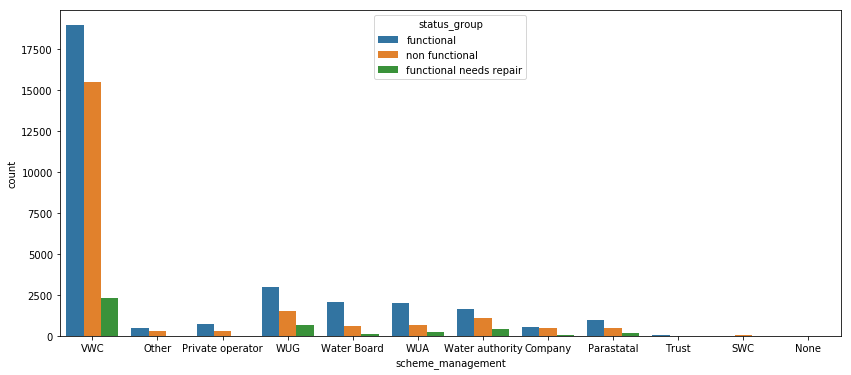

In [47]:
train_df.isnull().sum()
train_df.groupby(['scheme_management','scheme_name']).size()
plt.figure(figsize=(14,6))
sns.countplot(data = train_df,x = 'scheme_management',hue = 'status_group')


In [48]:
# Dropping Categorical Features with more than 3000 missing values
cat_fetrs = train_df.dtypes == object
fetrs_3000 = train_df.isnull().sum() > 3000
train_df = train_df.drop(train_df.columns[cat_fetrs & fetrs_3000],axis = 1) 
train_df.isnull().sum()

id                         0
amount_tsh                 0
date_recorded              0
gps_height                 0
longitude                  0
latitude                   0
basin                      0
subvillage               371
region                     0
region_code                0
district_code              0
lga                        0
ward                       0
population                 0
construction_year          0
extraction_type_group      0
management                 0
payment                    0
water_quality              0
quantity_group             0
source_type                0
waterpoint_type_group      0
status_group               0
dtype: int64

In [50]:
#Dealing with Geographic Location 
train_df.groupby(['subvillage','region','region_code','lga','ward']).sum()
train_df = train_df.drop(['subvillage','region_code','lga','ward'],axis = 1)


KeyError: 'subvillage'

In [53]:
train_df.dtypes
train_df = pd.get_dummies(train_df, dummy_na = True)

In [ ]:
# Learn about algorithms decision tress, XGboost
